In [2]:
import pandas as pd
path_to_file = r'C:\Users\User\Downloads\archive\insurance.csv'
df = pd.read_csv(path_to_file)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [32]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


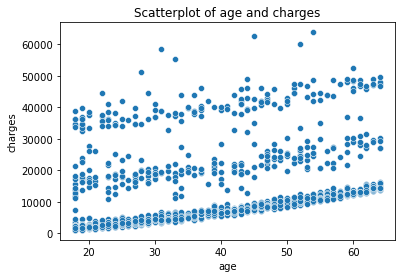

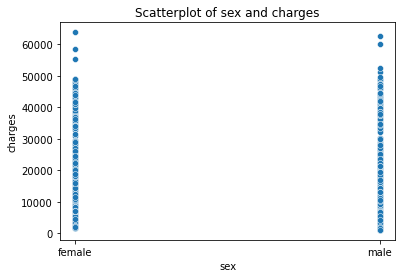

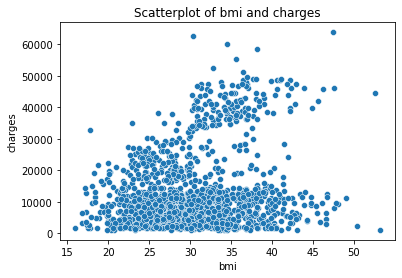

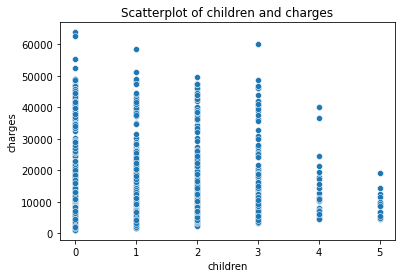

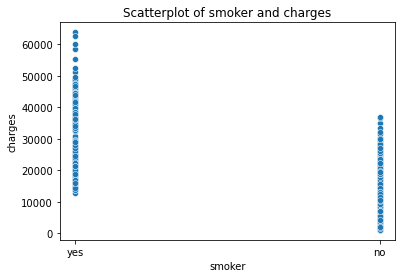

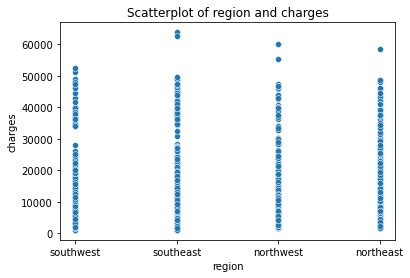

In [31]:
import seaborn as sns 
import matplotlib.pyplot as plt
variables = ['age', 'sex', 'bmi','children','smoker','region']

for var in variables:
    plt.figure() 
    sns.scatterplot(x=var, y='charges', data=df).set(title=f'Scatterplot of {var} and charges');

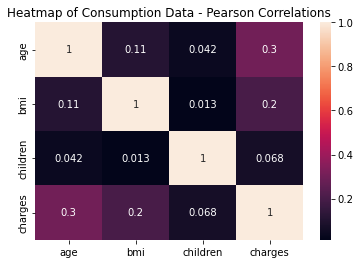

In [13]:
import seaborn as sns
correlations = df.corr()
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of insurance charges')

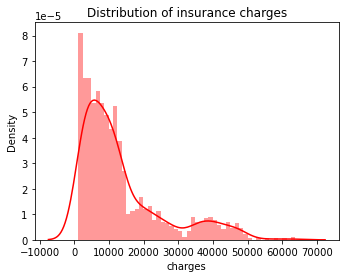

In [35]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

In [36]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [40]:
from scipy.stats import boxcox
import numpy as np
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [41]:
df_encode['charges'] = np.log(df_encode['charges'])

In [42]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) 
y = df_encode['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [43]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [44]:
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 
#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


In [47]:
y_pred_norm =  np.matmul(X_test_0,theta)
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE): ',J_mse)
print('R square obtain for normal equation method is :',R_square)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE):  0.1872962232298195
R square obtain for normal equation method is : 0.7795687545055312
R square obtain for scikit learn library is : 0.7795687545055319


In [51]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_norm})
print(results)

         Actual  Predicted
918    9.475924   9.328027
755    8.523428   8.665157
207    9.951520  10.349459
520   10.152555   9.085704
695    8.071295   8.407991
...         ...        ...
1302   8.073648   8.184626
1191   9.527009   8.861191
1085   9.853418  10.481768
663    7.035620   7.896219
977    7.973468   8.249789

[402 rows x 2 columns]
